Goal is to reconstruct curves w/ limited samples & specific format of input.
Ensure the way data is transformed and passed into the network
perserves the information.

State -> Stochastic -> State reconstruction

* Nyquist frequency - maximum frequency in a signla that can be well
  recorded given a certain samplign rate.
* Nyquist rate - sampling rate needed to record signal well given a
  maximum frequency in a signal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from spikey.input import *


INPUT = RateMap
FUNCTION = np.sin

In [6]:
## Stochastic Reconstruction vs N_INPUTS
"""
Noisy linear reconstruction of function with n samples.

Turn the function y value into a normalized value, plug that
value into a probability distribution and sample from processing_time
times per input neuron. Then average the samples and estimate the
original y value.
"""

@np.vectorize
def get_rate(y):
    """
    Effectively normalize y's to 0, 1 so the network can process.
    """
    MIN, MAX = -1, 1

    return (y - MIN) / (MAX - MIN)

@np.vectorize
def interpret(y, processing_time, n_inputs=1):
    """
    Convert probability to group of samples and interpret.
    """
    config = {
        'n_inputs': int(n_inputs),
        'magnitude': 1,
        'input_pct_inhibitory': 0,
        'state_rate_map': [0, .8]
    }
    get_values = get_rate

    reconstructor = INPUT(**config)
    reconstructor.update(y)

    return np.mean([reconstructor() for _ in range(processing_time)])

processing_time = 10

X = np.arange(0, 4*np.pi, .1)
Y = FUNCTION(X)

STEP = len(X) // 20

x = X[::STEP]
p_y = get_rate(Y[::STEP])

In [7]:
# Generate Reconstructions
reconstructions = {}
for n_inputs in [1, 5, 10]:
    reconstructions.update({n_inputs: interpret(Y[::STEP], processing_time, n_inputs=n_inputs)})

Text(0, 0.5, 'State')

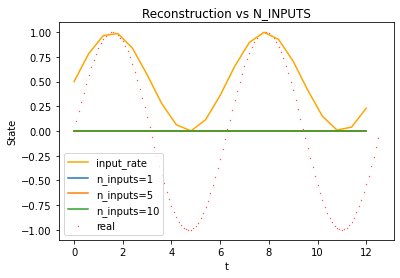

In [8]:
# Signal and rates
plt.scatter(X, Y, s=.1, c='red', label='real')
plt.plot(x, p_y, c='orange', label='input_rate')

for label, reconstruction in reconstructions.items():
    plt.plot(x, reconstruction, label=f'n_inputs={label}')

plt.legend()
plt.title("Reconstruction vs N_INPUTS")
plt.xlabel("t")
plt.ylabel("State")

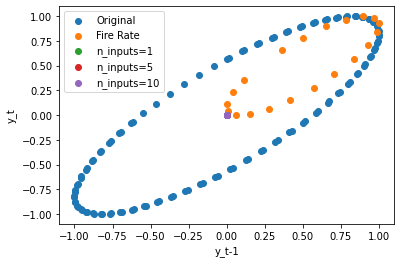

In [9]:
# Next state space
plt.scatter(Y[:-STEP], Y[STEP:], label='Original')
plt.scatter(p_y[:-1], p_y[1:], label='Fire Rate')
for label, reconstruction in reconstructions.items():
    plt.scatter(reconstruction[:-1], reconstruction[1:], label=f'n_inputs={label}')

plt.xlabel('y_t-1')
plt.ylabel('y_t')
plt.legend()

In [10]:
## Stochastic Reconstruction vs PROCESSING_TIME
n_inputs = 10

X = np.arange(0, 4*np.pi, .1)
Y = FUNCTION(X)

STEP = len(X) // 20

x = X[::STEP]
p_y = get_rate(Y[::STEP])

In [11]:
# Generate Reconstructions
reconstructions = {}
for processing_time in [1, 5, 10]:
    reconstructions.update({processing_time: interpret(Y[::STEP], processing_time, n_inputs=n_inputs)})


Text(0, 0.5, 'State')

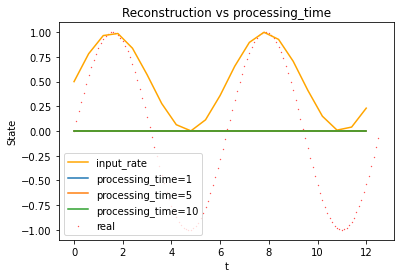

In [12]:
# Signal and rates
plt.scatter(X, Y, s=.1, c='red', label='real')
plt.plot(x, p_y, c='orange', label='input_rate')

for label, reconstruction in reconstructions.items():
    plt.plot(x, reconstruction, label=f'processing_time={label}')

plt.legend()
plt.title("Reconstruction vs processing_time")
plt.xlabel("t")
plt.ylabel("State")

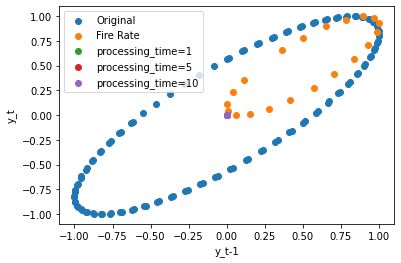

In [13]:
# Next state space
plt.scatter(Y[:-STEP], Y[STEP:], label='Original')
plt.scatter(p_y[:-1], p_y[1:], label='Fire Rate')
for label, reconstruction in reconstructions.items():
    plt.scatter(reconstruction[:-1], reconstruction[1:], label=f'processing_time={label}')

plt.xlabel('y_t-1')
plt.ylabel('y_t')
plt.legend()